   Study Hours  Attendance  Prev Score  Final Score
0            2          99          76        336.5
1            3          57          63        280.5
2            7          21          83        166.5
3            6          72          99        168.0
4            9          64          43        188.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  100 non-null    int64  
 1   Attendance   100 non-null    int64  
 2   Prev Score   100 non-null    int64  
 3   Final Score  100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None
       Study Hours  Attendance  Prev Score  Final Score
count   100.000000  100.000000  100.000000   100.000000
mean     20.140000   62.460000   45.230000   183.035000
std      13.928403   24.830911   22.538342    60.682368
min       0.000000   10.000000    5.000000    37.00000

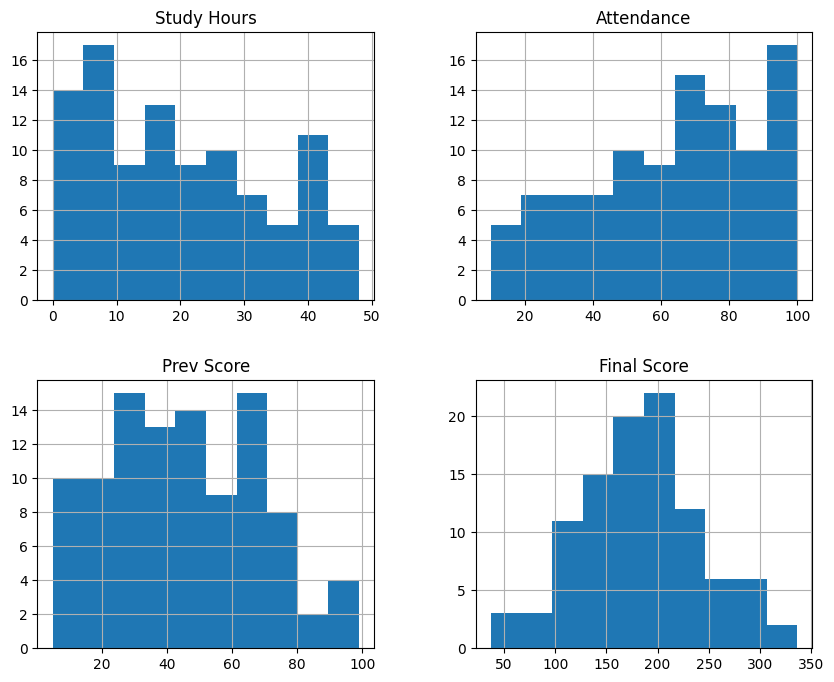


===== SIMPLE LINEAR REGRESSION ===telek==
Slope: 1.6096764351214512
Intercept: 150.61611659665397


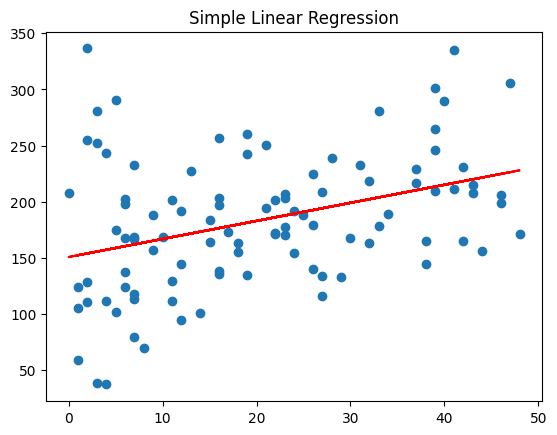

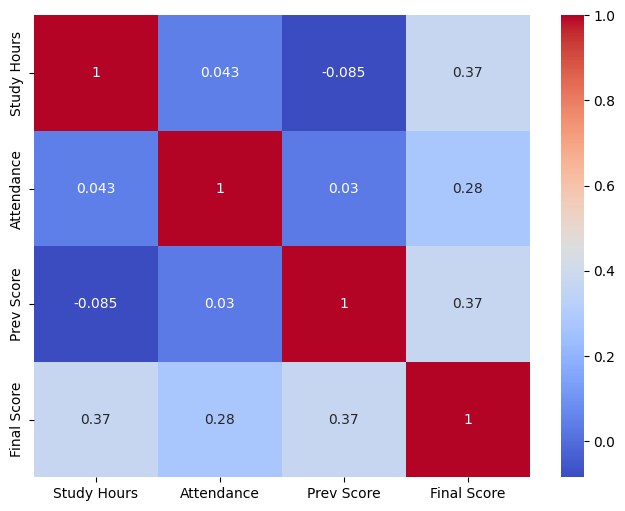


===== MULTIPLE LINEAR REGRESSION ===telek==
Coefficients: [62.28263615  1.71007982  0.60838644  1.06813042]
MSE: 2328.2022476430516
RMSE: 48.251448140372446
R2: 0.3613535956086199
MSE: 2328.2022476430516
RMSE: 48.251448140372446
R2: 0.3613535956086199

===== POLYNOMIAL REGRESSION ===telek==
Polynomial R2: 0.13894549311184767


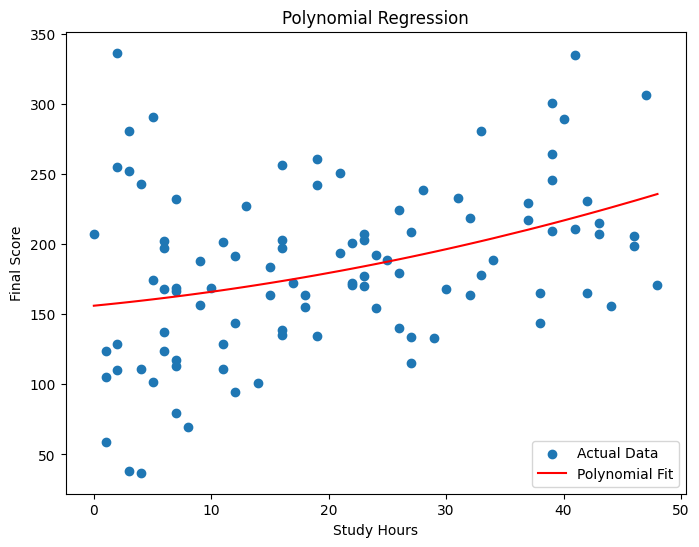


===== RIDGE REGRESSION ===telek==
Ridge coefficients: [62.28609787  1.70998776  0.60837942  1.06810457]
Ridge MSE: 2328.202249536075
Ridge RMSE: 48.25144815998868
Ridge R2: 0.36135359508934684

===== LASSO REGRESSION ===telek==
Lasso coefficients: [0.48679601 2.21530408 1.05401928 1.49253329]
Lasso MSE: 2611.7941788883745
Lasso RMSE: 51.10571571642818
Lasso R2: 0.28356182842534183


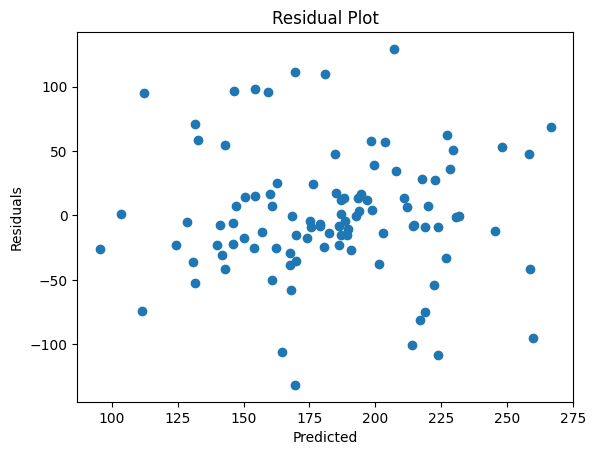

Original Beta:
 [62.28263615  1.71007982  0.60838644  1.06813042]
Ridge Beta:
 [62.28609787  1.70998776  0.60837942  1.06810457]
Lasso Beta:
 [0.48679601 2.21530408 1.05401928 1.49253329]

Multiple Linear Performance
MSE : 2328.2022476430516
RMSE: 48.251448140372446
R2  : 0.3613535956086199

Polynomial Performance
MSE : 3138.996829067928
RMSE: 56.02675101295745
R2  : 0.13894549311184767

Ridge Performance
MSE : 2328.202249536075
RMSE: 48.25144815998868
R2  : 0.36135359508934684

Lasso Performance
MSE : 2611.7941788883745
RMSE: 51.10571571642818
R2  : 0.28356182842534183


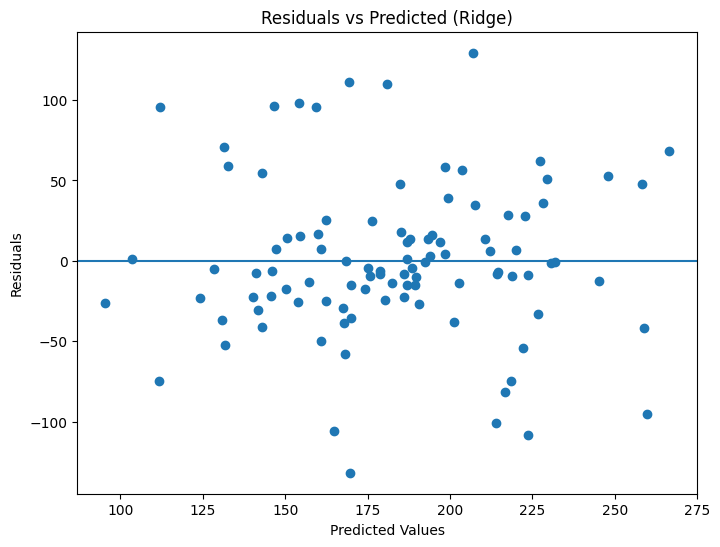

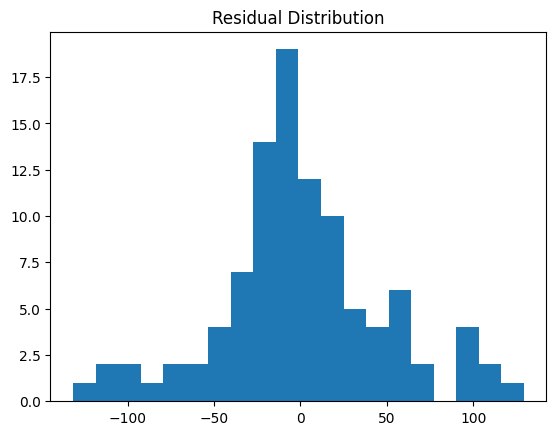

Mean of Residuals: 2.0364154806884471e-13


In [8]:
# STEP 1 — Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# STEP 2 — Dataset load
data = pd.read_csv("student.csv")
print(data.head())
print(data.info())



# STEP 3 — EDA
print(data.describe())
print(data.isnull().sum())
print(data.corr())

data.hist(figsize=(10,8))
plt.show()

# =====================================================
# SIMPLE LINEAR REGRESSION (manual formula)
# =====================================================
print("\n===== SIMPLE LINEAR REGRESSION ===telek==")

x = data['Study Hours'].values
y = data['Final Score'].values

x_mean = np.mean(x)
y_mean = np.mean(y)

b1 = np.sum((x-x_mean) * (y-y_mean)) / np.sum((x-x_mean)**2)
b0 = y_mean - b1*x_mean

print("Slope:", b1)
print("Intercept:", b0)

y_pred_simple = b0 + b1*x

plt.scatter(x,y)
plt.plot(x,y_pred_simple,color='red')
plt.title("Simple Linear Regression")
plt.show()

# STEP — Correlation Heatmap

import seaborn as sns   # add this line if not already imported

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')   # use your dataframe name
plt.show()

# =====================================================
# MULTIPLE LINEAR REGRESSION (Normal Equation)
# =====================================================
print("\n===== MULTIPLE LINEAR REGRESSION ===telek==")

X = data[['Study Hours','Attendance','Prev Score']].values
y = data['Final Score'].values

# add bias column
X_b = np.c_[np.ones((len(X),1)), X]

# normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Coefficients:", theta)

y_pred = X_b.dot(theta)

def mse(y, pred):
    return np.mean((y-pred)**2)

def rmse(y, pred):
    return np.sqrt(mse(y,pred))

def r2(y,pred):
    ss_total = np.sum((y-np.mean(y))**2)
    ss_res = np.sum((y-pred)**2)
    return 1 - ss_res/ss_total

print("MSE:", mse(y,y_pred))
print("RMSE:", rmse(y,y_pred))
print("R2:", r2(y,y_pred))


# =====================================================
# METRICS (manual)
# =====================================================
def mse(y, pred):
    return np.mean((y-pred)**2)

def rmse(y, pred):
    return np.sqrt(mse(y,pred))

def r2(y,pred):
    ss_total = np.sum((y-np.mean(y))**2)
    ss_res = np.sum((y-pred)**2)
    return 1 - ss_res/ss_total

print("MSE:", mse(y,y_pred))
print("RMSE:", rmse(y,y_pred))
print("R2:", r2(y,y_pred))

# =====================================================
# POLYNOMIAL REGRESSION (degree 2 manual)
# =====================================================
print("\n===== POLYNOMIAL REGRESSION ===telek==")

x_poly = data['Study Hours'].values # Changed 'Feature1' to 'Study Hours'
y_poly = data['Final Score'].values # Added this line to define y for polynomial regression
X_poly = np.c_[np.ones(len(x_poly)), x_poly, x_poly**2]

theta_poly = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y_poly) # Changed y to y_poly
y_pred_poly = X_poly.dot(theta_poly)

print("Polynomial R2:", r2(y_poly,y_pred_poly)) # Changed y to y_poly

# Polynomial Regression Plot

plt.figure(figsize=(8,6))

# actual data
plt.scatter(x_poly, y, label="Actual Data")

# sort values for smooth curve
sorted_index = np.argsort(x_poly)
x_sorted = x_poly[sorted_index]
y_sorted = y_pred_poly[sorted_index]

# polynomial curve
plt.plot(x_sorted, y_sorted, color='red', label="Polynomial Fit")

plt.title("Polynomial Regression")
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.legend()

plt.show()

# =====================================================
# RIDGE REGRESSION (manual)
# =====================================================
print("\n===== RIDGE REGRESSION ===telek==")

lam = 1
I = np.eye(X_b.shape[1])

I[0,0] = 0   # do NOT regularize bias term

theta_ridge = np.linalg.inv(X_b.T.dot(X_b) + lam*I).dot(X_b.T).dot(y)
print("Ridge coefficients:", theta_ridge)

# create predictions
y_pred_ridge = X_b.dot(theta_ridge)

# evaluate using your custom functions
print("Ridge MSE:", mse(y, y_pred_ridge))
print("Ridge RMSE:", rmse(y, y_pred_ridge))
print("Ridge R2:", r2(y, y_pred_ridge))

# =====================================================
# LASSO REGRESSION (Gradient Descent)
# =====================================================
print("\n===== LASSO REGRESSION ===telek==")

theta_lasso = np.zeros(X_b.shape[1])
lr = 0.0001
lam = 0.1

for _ in range(1000):
    pred = X_b.dot(theta_lasso)
    error = pred - y

    grad = X_b.T.dot(error)/len(y)

    theta_lasso -= lr*(grad + lam*np.sign(theta_lasso))

print("Lasso coefficients:", theta_lasso)

# IMPORTANT: create predictions
y_pred_lasso = X_b.dot(theta_lasso)

# evaluate
print("Lasso MSE:", mse(y, y_pred_lasso))
print("Lasso RMSE:", rmse(y, y_pred_lasso))
print("Lasso R2:", r2(y, y_pred_lasso))

# =====================================================
# RESIDUAL PLOT
# =====================================================
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

print("Original Beta:\n", theta)
print("Ridge Beta:\n", theta_ridge)
print("Lasso Beta:\n", theta_lasso)

def evaluate(y_true, y_pred, name="Model"):
    print(f"\n{name} Performance")
    print("MSE :", mse(y_true, y_pred))
    print("RMSE:", rmse(y_true, y_pred))
    print("R2  :", r2(y_true, y_pred))
evaluate(y, y_pred, "Multiple Linear")
evaluate(y, y_pred_poly, "Polynomial")
evaluate(y, y_pred_ridge, "Ridge")
evaluate(y, y_pred_lasso, "Lasso")

# Residual plot (using Ridge model)

residuals = y - y_pred_ridge

plt.figure(figsize=(8,6))
plt.scatter(y_pred_ridge, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Ridge)")
plt.show()

plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.show()

print("Mean of Residuals:", np.mean(residuals))